In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
X,Y=datasets.make_moons(n_samples=1000, noise=0.3, random_state=42)

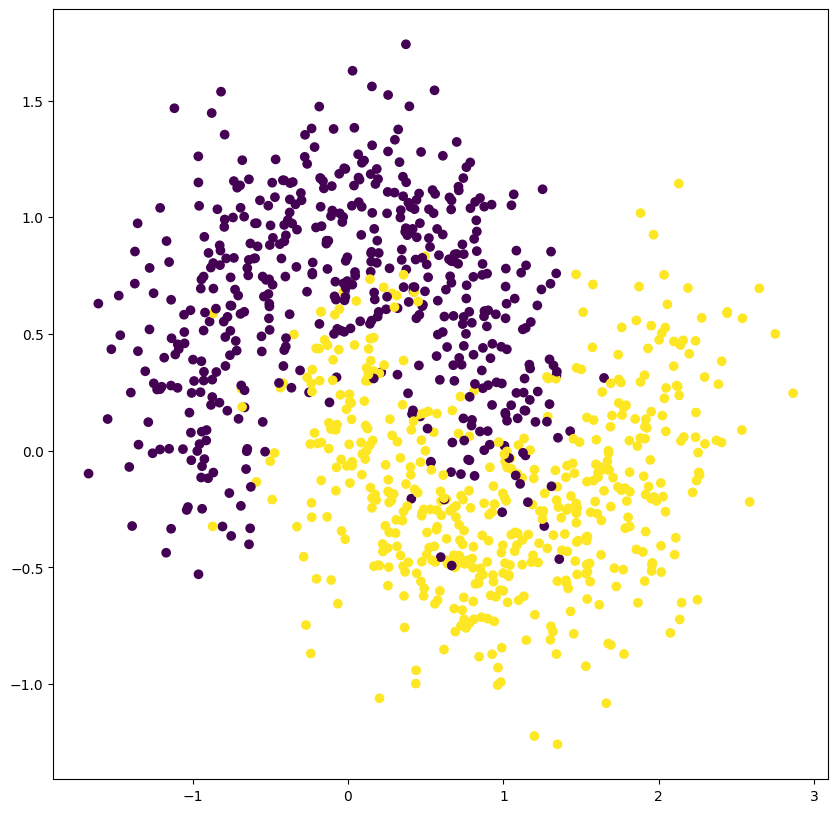

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [54]:
clf = svm.SVC(kernel='rbf', C=1.0)
clf.fit(X_train, Y_train)

SVC()

Accuracy: 0.9166666666666666


<Axes: >

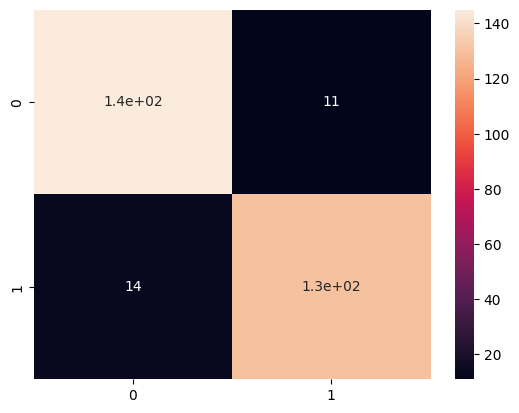

In [55]:
predictions = clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predictions))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True)

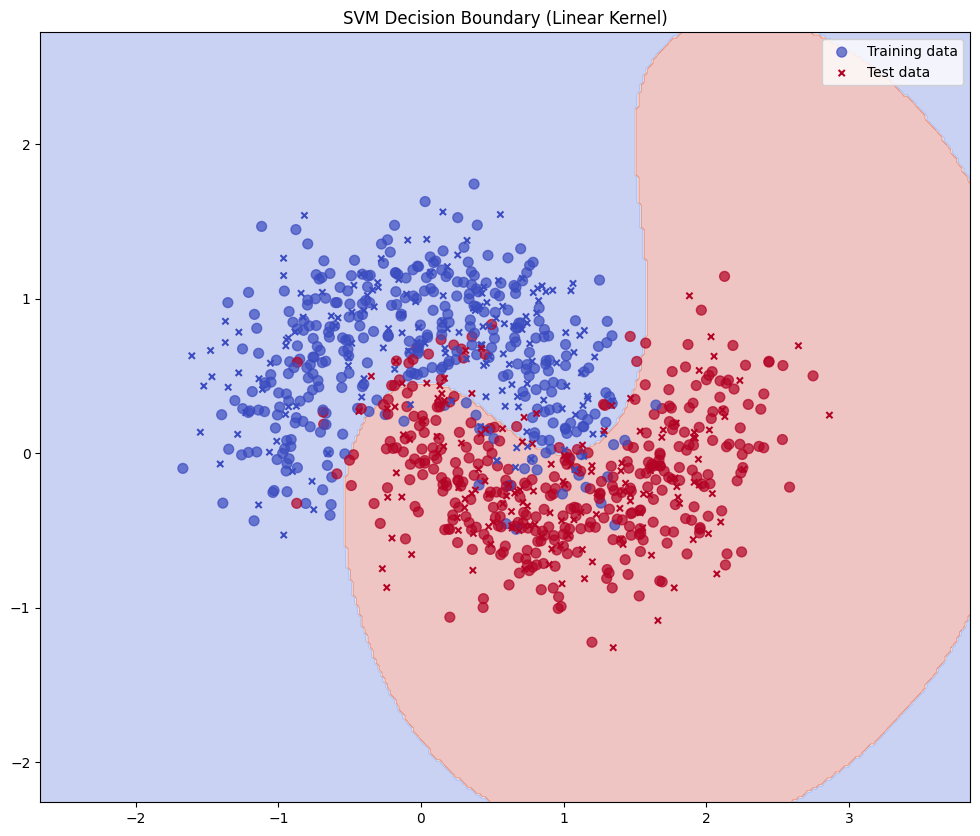

In [61]:
# Create mesh grid for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=50, alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, s=20, marker='x')

plt.title('SVM Decision Boundary (Linear Kernel)')
plt.legend(['Training data', 'Test data'])
plt.show()